# mini_project_1.ipynb

This mini project works with data from the official F1 website: formula1.com<br>
<br>
In the notebook **read_from_formula1_website.ipynb** results from all races from 1950 to 2024<br>
are read from the website and stored as html files in a directory called "html".<br>
<br>
Functionality for reading from the website and storing as html files is in the module **f1_reader.py**.<br>
This module also contain functionality for reading the results from the html files into pandas data frames.<br>

In [1]:
import sys
sys.path.append("..")

import pandas as pd
from reader import f1_reader

First results from all F1 races from 1950 to 2024 is loaded into the variable `results`.<br>
`results` is a dictionary with key: `year` and value: `season`<br>
Each `season` is a dictionary with key: `race_no` and value: data frame with race result.<br>

In [2]:
directory = "html"

results = {}
for year in range(1950, 2025):
    results[year] = f1_reader.read_f1_season_from_html_files_to_dictionary(year, directory)

Here is how a race result is accessed:<br>
`results[year][race_no]` -> data frame with race result<br>

As an example is here shown the race result from the 6th race of the 2024 season:

In [3]:
results[2024][6]

,POS.,NO.,DRIVER,TEAM,LAPS,TIME / RETIRED,PTS.
0,1,4,Lando Norris NOR,McLaren Mercedes,57,1:30:49.876,25.0
1,2,1,Max Verstappen VER,Red Bull Racing Honda RBPT,57,+7.612s,18.0
2,3,16,Charles Leclerc LEC,Ferrari,57,+9.920s,15.0
3,4,11,Sergio Perez PER,Red Bull Racing Honda RBPT,57,+14.650s,12.0
4,5,55,Carlos Sainz SAI,Ferrari,57,+16.407s,10.0
5,6,44,Lewis Hamilton HAM,Mercedes,57,+16.585s,8.0
6,7,22,Yuki Tsunoda TSU,RB Honda RBPT,57,+26.185s,6.0
7,8,63,George Russell RUS,Mercedes,57,+34.789s,4.0
8,9,14,Fernando Alonso ALO,Aston Martin Aramco Mercedes,57,+37.107s,2.0
9,10,31,Esteban Ocon OCO,Alpine Renault,57,+39.746s,1.0


The data frames also contains metadata:
- Race title
- Race notes (if any)

In [4]:
results[2024][6].attrs

{'race_title': 'FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2024',
 'race_notes': 'Magnussen received a 10-second time penalty for causing a collision and a 20-second time penalty for entering the pits during a Safety Car period and not changing tyres. Stroll received a 10-second time penalty for leaving the track and gaining an advantage. Sainz received a five-second time penalty for causing a collision.'}

## Races per season
Now number of races per season is explored.<br>
From `results` is generated a pandas series `races_per_season` with this information.

In [5]:
races_per_season = {year: len(season) for year, season in results.items()}
races_per_season = pd.Series(races_per_season)
races_per_season

1950     7
1951     9
1952     8
1953     9
1954     9
        ..
2020    17
2021    22
2022    22
2023    22
2024    24
Length: 75, dtype: int64

`races_per_season` is plotted as a bar chart, so the information can be explored visually:

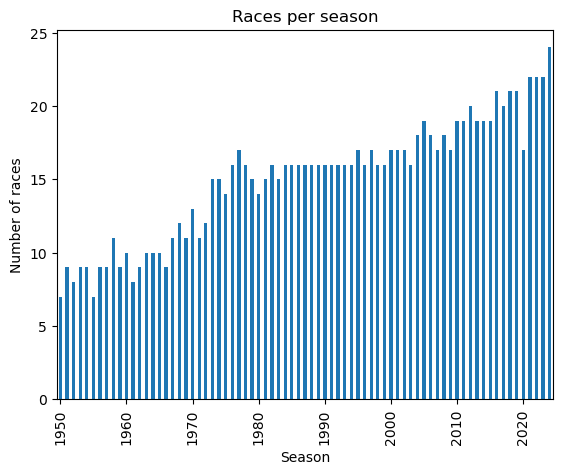

In [6]:
ax = races_per_season.plot(kind="bar")
ax.set_title("Races per season")
ax.set_xticks(range(0, len(races_per_season), 10));
ax.set_xlabel("Season")
ax.set_ylabel("Number of races");

From the plot is seen that the number of races per season has increased a lot<br>
from the inception of Formula 1 in 1950 up until today:<br>
From 7 races in 1950 to 24 races in 2024 is an increase by a factor of 3.4

## Championship standings
Now the championship standings for each season will be calculated,<br>
by summing the total amount of points for each driver in each season.<br>
<br>
The result is stored in the dictionary `championships`:<br>
`championships[year]` -> data frame with championship standings<br>

In [7]:
championships = {}
for year in range(1950, 2025):
    total = pd.concat(results[year].values(), ignore_index=True)
    total = total.groupby("DRIVER", as_index=False)["PTS."].sum()
    total = total.sort_values("PTS.", ascending=False).reset_index(drop=True)
    championships[year] = total

The championship standings calculation is actually a bit of a simplification,<br>
because of various rules Formula 1 have used throughout the years, e.g.:
- From 1981-1990 only a drivers best 11 race results counted towards the championship.
- Since 2021, select grand prixs have held an additional sprint race which have also awarded points.

But for the 2000 season the calculation is accurate,<br>
and for this season we see that 23 drivers competed,<br>
and Michael Schumacher won with 108 points:

In [8]:
championships[2000]

,DRIVER,PTS.
0,Michael Schumacher MSC,108.0
1,Mika Hakkinen HAK,89.0
2,David Coulthard COU,73.0
3,Rubens Barrichello BAR,62.0
4,Ralf Schumacher RSC,24.0
5,Giancarlo Fisichella FIS,18.0
6,Jacques Villeneuve VIL,17.0
7,Jenson Button BUT,12.0
8,Heinz-Harald Frentzen FRE,11.0
9,Jarno Trulli TRU,6.0


## Most successful driver ever
Now is explored who is the most successful driver ever, based on the total number of points accumulated.

To do this an `all_time_table` for all drivers who competed in F1 is calculated.

In [9]:
all_time_table = pd.concat(championships.values(), ignore_index=True)
all_time_table = all_time_table.groupby("DRIVER", as_index=False)["PTS."].sum()
all_time_table = all_time_table.sort_values("PTS.", ascending=False).reset_index(drop=True)
all_time_table

,DRIVER,PTS.
0,Lewis Hamilton HAM,4820.5
1,Sebastian Vettel VET,3098.0
2,Max Verstappen VER,2893.5
3,Fernando Alonso ALO,2329.0
4,Kimi Räikkönen RAI,1873.0
...,...,...
781,Willi Heeks HEE,0.0
782,Wolfgang Seidel SEI,0.0
783,Xavier Perrot PER,0.0
784,Yannick Dalmas DAL,0.0


We see that 786 drivers have competed in Formula 1, and that Lewis Hamilton is the most successful driver ever.

`all_time_table` is now plotted as a bar chart, so the information can be explored visually:

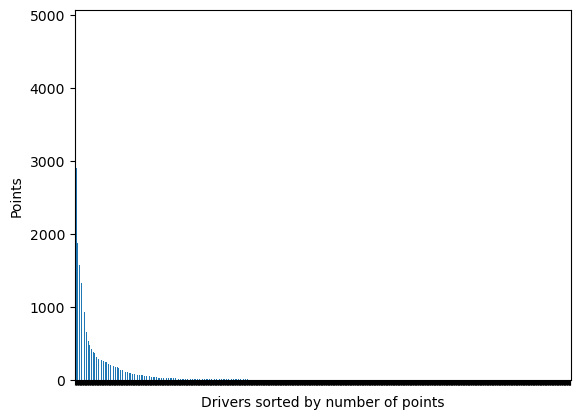

In [10]:
ax = all_time_table.plot(kind="bar", x="DRIVER", y="PTS.", legend=False)
ax.set_xticklabels([]);
ax.set_xlabel("Drivers sorted by number of points")
ax.set_ylabel("Points");

From the plot we see that the 786 drivers does not roughly have the same amount of points.<br>
In fact, most of the points belong to a few drivers.<br>
This looks like the Pareto distribution:<br>
https://en.wikipedia.org/wiki/Pareto_distribution

## Ideas for further analysis

Michael Schumacher, who was known to be a very successful driver, is only number 9 in `all_time_table`:

In [11]:
all_time_table.head(10)

,DRIVER,PTS.
0,Lewis Hamilton HAM,4820.5
1,Sebastian Vettel VET,3098.0
2,Max Verstappen VER,2893.5
3,Fernando Alonso ALO,2329.0
4,Kimi Räikkönen RAI,1873.0
5,Valtteri Bottas BOT,1788.0
6,Nico Rosberg ROS,1594.5
7,Sergio Perez PER,1573.0
8,Michael Schumacher MSC,1566.0
9,Charles Leclerc LEC,1363.0


However, in most of Michael Schumachers career only 10 points was awarded for a win,<br>
whereas today 25 points is awarded for a win:<br>
https://en.wikipedia.org/wiki/List_of_Formula_One_World_Championship_points_scoring_systems

The different points scoring systems used throughout the years is read in from an Excel file:

In [12]:
from reader import generic_reader
generic_reader.read_excel_file_to_data_frame("PointsScoringSystems.xlsx")

,YEAR START,YEAR END,POS. 1,POS. 2,POS. 3,POS. 4,POS. 5,POS. 6,POS. 7,POS. 8,POS. 9,POS. 10
0,1950,1959,8,6,4,3,2,0,0,0,0,0
1,1960,1960,8,6,4,3,2,1,0,0,0,0
2,1961,1990,9,6,4,3,2,1,0,0,0,0
3,1991,2002,10,6,4,3,2,1,0,0,0,0
4,2003,2009,10,8,6,5,4,3,2,1,0,0
5,2010,-,25,18,15,12,10,8,6,4,2,1


An idea for further analysis is to apply e.g. the current point scoring system to all seasons,<br>
and then calculate an all time table which is more fair.<br>
<br>
Also, in much of Michael Schumachers career there were only 16 races per season, whereas today there is 24.<br>
It would also be more fair if this could somehow be accounted for.<br>
